# ----------------------------------- Basic Analysis -----------------------------------

In [1]:
from main import *

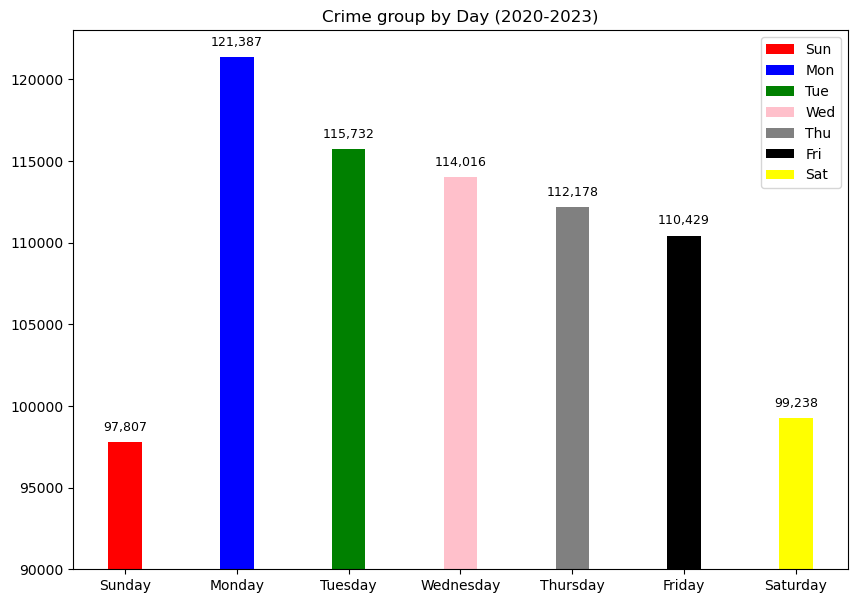

In [3]:
# What is the day with the highest percentage of crimes
fact_dayname = Fact[['File_Number','Report_Date','Occ_Time']].merge(Dim_Date[['Report_Date','Day_Name','Week_Day']],how = 'left', on = 'Report_Date')
crime_for_day = fact_dayname.groupby(['Day_Name','Week_Day'])['File_Number'].count().reset_index()
crime_for_day = crime_for_day.sort_values(by = 'Week_Day')
X = crime_for_day['Day_Name']
Y = crime_for_day['File_Number']


figure = plt.figure(figsize = (10,7))
plt.ylim(90000,123000)
bars = plt.bar(X,Y,color = ['r','b','g','pink','gray','black','yellow'],label = [day[:3] for day in crime_for_day['Day_Name'].tolist()],width=0.3)
plt.legend()
plt.title("Crime group by Day (2020-2023)")
for bar, value in zip(bars, Y):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{int(value):,}', ha='center', va='bottom', color='black', fontsize=9)



plt.show()